In [ ]:
import numpy as np
import os
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [ ]:
# Parameters
image_size = 224
dataset_path = '/content/drive/MyDrive/colored_images'
labels = ['Mild', 'Moderate', 'No_DR', 'Proliferate_DR', 'Severe']

In [ ]:
# Load all images with labels
X, Y = [], []
for label in labels:
    folder_path = os.path.join(dataset_path, label)
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, (image_size, image_size))
            X.append(img)
            Y.append(label)

In [ ]:
# Convert to NumPy arrays
X = np.array(X)
Y = np.array(Y)

# Convert string labels to integer indices and one-hot encode
label_to_index = {label: idx for idx, label in enumerate(labels)}
Y_int = [label_to_index[label] for label in Y]
Y = to_categorical(Y_int, num_classes=len(labels))

In [ ]:
# Split into training and validation (80% train, 20% val)
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, stratify=Y_int, random_state=42)

In [ ]:
# Load the VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Freeze the base model's layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers on top of the base model
x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(len(labels), activation='softmax')(x)

# Create the complete model
model = Model(inputs=base_model.input, outputs=output)


In [ ]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Summary of the model
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,926,725 (68.39 MB)

 Trainable params: 3,212,037 (12.25 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
# Train the model
history = model.fit(X_train, Y_train, epochs=25, validation_data=(X_val, Y_val), batch_size=32)

Epoch 1/25
114/114 ━━━━━━━━━━━━━━━━━━━━ 24s 211ms/step - accuracy: 0.8708 - loss: 0.2966 - val_accuracy: 0.8974 - val_loss: 0.3142
Epoch 2/25
114/114 ━━━━━━━━━━━━━━━━━━━━ 41s 212ms/step - accuracy: 0.8962 - loss: 0.2472 - val_accuracy: 0.8940 - val_loss: 0.3071
Epoch 3/25
114/114 ━━━━━━━━━━━━━━━━━━━━ 24s 210ms/step - accuracy: 0.8769 - loss: 0.2775 - val_accuracy: 0.8962 - val_loss: 0.3208
Epoch 4/25
114/114 ━━━━━━━━━━━━━━━━━━━━ 24s 209ms/step - accuracy: 0.8870 - loss: 0.2477 - val_accuracy: 0.8863 - val_loss: 0.3494
Epoch 5/25
114/114 ━━━━━━━━━━━━━━━━━━━━ 41s 206ms/step - accuracy: 0.9039 - loss: 0.2193 - val_accuracy: 0.9128 - val_loss: 0.2745
Epoch 6/25
114/114 ━━━━━━━━━━━━━━━━━━━━ 42s 214ms/step - accuracy: 0.8879 - loss: 0.2514 - val_accuracy: 0.9139 - val_loss: 0.2793
Epoch 7/25
114/114 ━━━━━━━━━━━━━━━━━━━━ 24s 210ms/step - accuracy: 0.8955 - loss: 0.2319 - val_accuracy: 0.9073 - val_loss: 0.3212
Epoch 8/25
114/114 ━━━━━━━━━━━━━━━━━━━━ 41s 207ms/step - accuracy: 0.9062 - loss: 0

In [ ]:
# Save the model
model.save('/content/drive/MyDrive/VGG16_DR_Model_Final.keras')


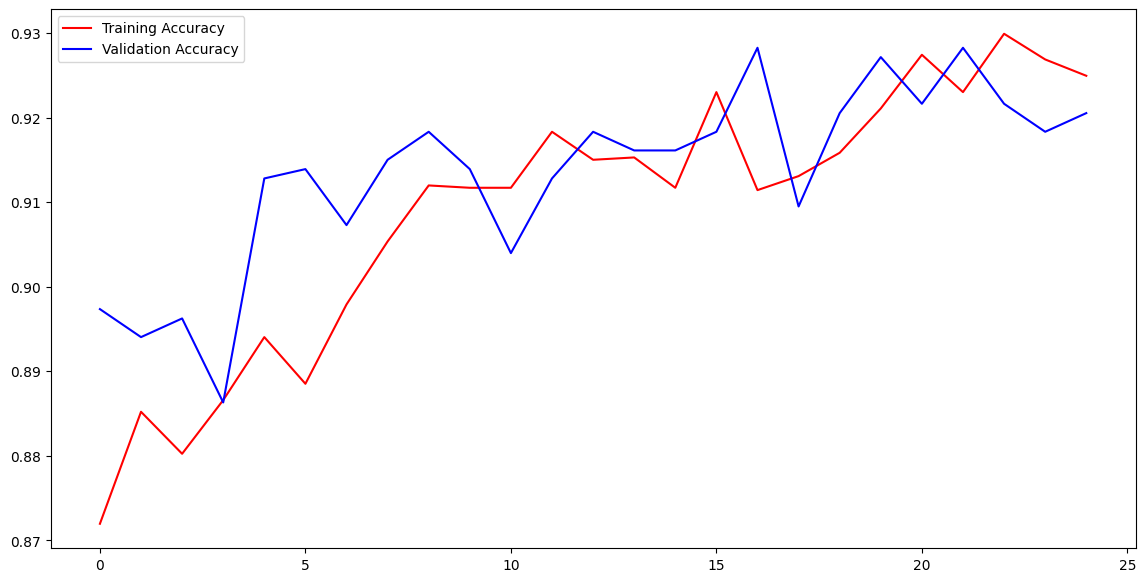

In [ ]:
# Plot training and validation accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.figure(figsize=(14, 7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

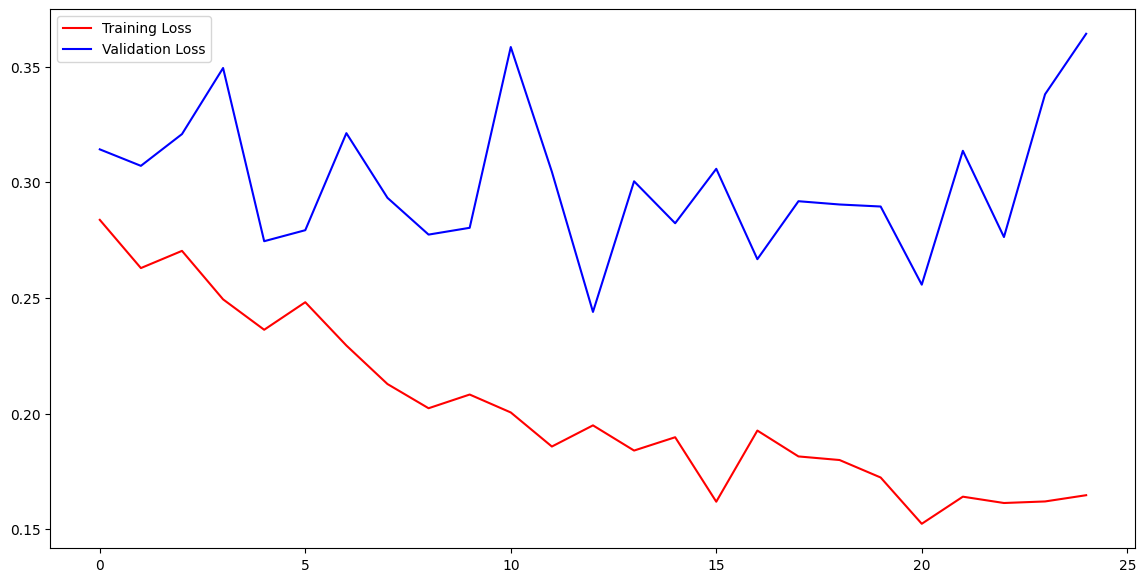

In [ ]:
# Plot training and validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(14, 7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper left')
plt.show()

In [ ]:
# Verify the model with a sample image
sample_img_path = '/content/drive/MyDrive/colored_images/Severe/03c85870824c.png'  # Replace with the actual image path
sample_img = cv2.imread(sample_img_path)
sample_img = cv2.resize(sample_img, (image_size, image_size))
sample_img_array = np.array(sample_img).reshape(1, image_size, image_size, 3)

# Predict
pred = model.predict(sample_img_array)
predicted_label = labels[np.argmax(pred)]
print(f"The model predicts: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
The model predicts: Severe
